# Status of the Thalamus Corpus

This notebook compute and display some useful information about the status of the thalamus corpus.

In [1]:
## Installation of the Neuro Annotation Toolbox (NAT)
!pip3 install -q --upgrade  git+https://github.com/BlueBrain/nat.git --user #--force-reinstall
    
## Installation of other standard toolboxes
!pip3 install -q matplotlib seaborn --user

In [2]:
## Downloading the Thalamus corpus
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

In [3]:
from glob import glob

from nat.annotation import Annotation
from nat.treeData import flatten_list

annotations = []
for fileName in glob(repo_dir + "/*.pcr"):
    try:
        annotations.extend(Annotation.readIn(open(fileName, "r", encoding="utf-8", errors='ignore')))
    except:       
        print("Skipping: ", fileName)    
        raise

In [4]:
import pandas as pd
import numpy as np

pd.DataFrame({"Nb. annotations" : [len(annotations)],
              "Nb. papers"      : [len(np.unique([annot.pubId for annot in annotations]))],
              "Nb. parameters"  : [len(flatten_list([[(param, annot) for param in annot.parameters]  
                                                     for annot in annotations]))]})

,Nb. annotations,Nb. papers,Nb. parameters
0,435,80,357


In [5]:
parameters = flatten_list([annot.parameters for annot in annotations])

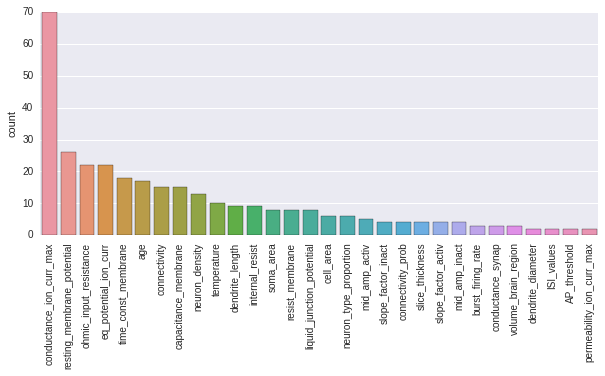

In [6]:
%matplotlib inline
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from nat.modelingParameter import getParameterTypeNameFromID

plt.figure(figsize=(10, 4))

paramTypes = pd.Series([param.typeId for param in parameters])

axes = sb.countplot(paramTypes, orient='h',
                    order=paramTypes.value_counts().iloc[:30].index)

#plt.xticks(plt.xticks(), plt.gca().get_xticklabels(), rotation='vertical')
paramNames = [getParameterTypeNameFromID(typeId.get_text()) for typeId in axes.get_xticklabels()]
axes.set_xticklabels(paramNames, rotation='vertical')
pass

plt.savefig("annotatedParamHist.png", bbox_inches='tight', dpi=300)